<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/Edulearn_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plataforma Edulearn

#Importando as bibliotecas

In [75]:
#Importando as bibliotecas
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import warnings
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style
import pandas as pd
import numpy as np

In [76]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [77]:
#Instalando a biblioteca biokit
#A versão atual do biokit (0.4.6) não é compatível com o Windows 10, é necessário instalar a versão 0.4.2, neste caso. 
!pip install biokit=="0.4.2"

#Importando os dados

In [78]:
#Importando os dados
df = pd.read_csv("dados_ies_sem_nan_sem_privadas_especial_utf8.csv", sep=',', encoding='utf8', index_col=0)
df.head(4)

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,114,1,Pública Federal,Centro-Oeste,Mato Grosso,92.0,58.0,44.0,17.0,2.0,0.271930,0.429825,0.938596,0.201754,0.201754
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
2,116,3,Pública Federal,Nordeste,Sergipe,190.0,56.0,94.0,16.0,2.0,0.775862,1.215517,1.793103,0.534483,0.534483
3,107,4,Pública Federal,Norte,Amazonas,64.0,33.0,54.0,60.0,2.0,0.000000,0.000000,0.719626,0.000000,0.000000


In [79]:
df.describe()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,44.340426,6287.914894,24.923404,13.493617,25.446809,8.442553,1.502128,1.417101,1.745655,1.705928,0.913836,0.913836
std,50.358576,7549.619255,42.951106,29.915746,53.700900,16.710196,3.100006,1.581439,2.121358,1.817401,1.041736,1.041736
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,586.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010227,0.315341,0.000000,0.000000
50%,29.000000,1876.000000,7.000000,3.000000,6.000000,2.000000,0.000000,0.769231,0.911111,1.000000,0.500000,0.500000
75%,61.500000,15513.500000,28.500000,16.500000,26.500000,8.000000,1.000000,2.367018,2.700000,2.571895,1.495614,1.495614
max,296.000000,24672.000000,284.000000,349.000000,351.000000,117.000000,17.000000,6.000000,9.000000,8.000000,4.000000,4.000000


In [80]:
#Selecionando apenas as IES que possuem recursos
df = df.loc[(df['RECURSOS_DEF_FISICA'] > 0.0) & (df['RECURSOS_DEF_VISUAL'] > 0.0) & (df['RECURSOS_DEF_AUDITIVA'] > 0.0) & (df['RECURSOS_DEF_COGNITIVA'] > 0.0)  & (df['RECURSOS_DEF_MULTIPLA'] > 0.0)]

In [81]:
df.describe()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,49.261905,5455.535714,28.720238,15.857143,27.488095,9.630952,1.815476,1.982254,2.420725,2.293775,1.278283,1.278283
std,50.661048,6866.055986,45.712447,33.941882,56.410279,17.556942,3.440930,1.541863,2.164117,1.832294,1.025644,1.025644
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030534,0.022901,0.127273,0.022901,0.022901
25%,6.000000,584.750000,2.000000,1.000000,2.000000,0.000000,0.000000,0.658654,0.641892,0.842949,0.422390,0.422390
50%,36.000000,1811.500000,12.000000,5.000000,9.000000,3.000000,0.000000,1.594952,1.744510,1.931713,1.000000,1.000000
75%,66.000000,5650.000000,36.250000,18.250000,30.250000,11.000000,2.000000,3.000000,3.818475,3.283083,2.000000,2.000000
max,296.000000,24672.000000,284.000000,349.000000,351.000000,117.000000,17.000000,6.000000,9.000000,8.000000,4.000000,4.000000


#Tratando os dados

## Outliers

Número de cursos

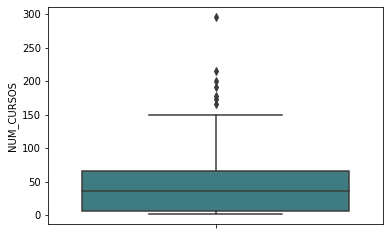

In [82]:
#Visualizando os outliers de número de cursos
sns.boxplot(y="NUM_CURSOS", palette="crest_r", data=df)

In [83]:
df.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,114,1,Pública Federal,Centro-Oeste,Mato Grosso,92.0,58.0,44.0,17.0,2.0,0.271930,0.429825,0.938596,0.201754,0.201754
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
2,116,3,Pública Federal,Nordeste,Sergipe,190.0,56.0,94.0,16.0,2.0,0.775862,1.215517,1.793103,0.534483,0.534483
4,100,5,Pública Federal,Nordeste,Piauí,137.0,50.0,73.0,36.0,3.0,4.200000,5.880000,5.880000,2.520000,2.520000
5,55,6,Pública Federal,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636


Tratando Outliers

In [84]:
num_cursos_novo = df['NUM_CURSOS']
Q1 = num_cursos_novo.quantile(.25)
Q3 = num_cursos_novo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [85]:
selecao = (num_cursos_novo >= limite_inferior) & (num_cursos_novo <= limite_superior)
novo_df = df[selecao]
novo_df.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,114,1,Pública Federal,Centro-Oeste,Mato Grosso,92.0,58.0,44.0,17.0,2.0,0.271930,0.429825,0.938596,0.201754,0.201754
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
2,116,3,Pública Federal,Nordeste,Sergipe,190.0,56.0,94.0,16.0,2.0,0.775862,1.215517,1.793103,0.534483,0.534483
4,100,5,Pública Federal,Nordeste,Piauí,137.0,50.0,73.0,36.0,3.0,4.200000,5.880000,5.880000,2.520000,2.520000
5,55,6,Pública Federal,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636


In [86]:
novo_df.describe()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,42.590062,5677.409938,28.049689,15.608696,27.447205,9.006211,1.608696,2.015411,2.454951,2.331534,1.297839,1.297839
std,39.113053,6929.170830,45.790119,34.534254,57.436911,17.243295,3.108806,1.549463,2.177225,1.842168,1.030752,1.030752
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030534,0.022901,0.127273,0.022901,0.022901
25%,6.000000,591.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.700000,0.750000,0.938596,0.450000,0.450000
50%,34.000000,1874.000000,11.000000,5.000000,8.000000,3.000000,0.000000,1.712329,1.770270,1.953846,1.000000,1.000000
75%,59.000000,14408.000000,36.000000,17.000000,30.000000,9.000000,2.000000,3.000000,3.846154,3.342857,2.000000,2.000000
max,150.000000,24672.000000,284.000000,349.000000,351.000000,117.000000,16.000000,6.000000,9.000000,8.000000,4.000000,4.000000


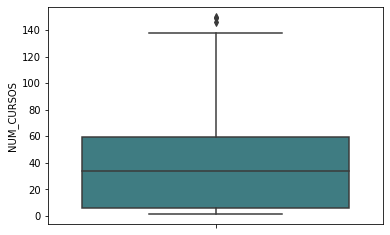

In [87]:
sns.boxplot(y='NUM_CURSOS', palette="crest_r", data=novo_df)

Alunos com deficiência

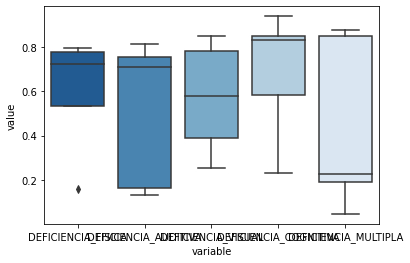

In [88]:
#Visualizando os outliers de alunos por deficiência
deficiencia = pd.DataFrame(data = np.random.random(size=(5,5)), columns = ['DEFICIENCIA_FISICA','DEFICIENCIA_AUDITIVA','DEFICIENCIA_VISUAL','DEFICIENCIA_COGNITIVA','DEFICIENCIA_MULTIPLA'])
sns.boxplot(x="variable", y="value", data=pd.melt(deficiencia), palette="Blues_r")
plt.show()

In [89]:
df.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,114,1,Pública Federal,Centro-Oeste,Mato Grosso,92.0,58.0,44.0,17.0,2.0,0.271930,0.429825,0.938596,0.201754,0.201754
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
2,116,3,Pública Federal,Nordeste,Sergipe,190.0,56.0,94.0,16.0,2.0,0.775862,1.215517,1.793103,0.534483,0.534483
4,100,5,Pública Federal,Nordeste,Piauí,137.0,50.0,73.0,36.0,3.0,4.200000,5.880000,5.880000,2.520000,2.520000
5,55,6,Pública Federal,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636


In [90]:
#Tratando outliers no campo de recursos para deficiência física
deficiencia_fisica = df['DEFICIENCIA_FISICA']
Q1 = deficiencia_fisica.quantile(.25)
Q3 = deficiencia_fisica.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [91]:
selecao = (deficiencia_fisica >= limite_inferior) & (deficiencia_fisica <= limite_superior)
novo_df = novo_df[selecao]
novo_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
5,55,6,Pública Federal,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636
6,76,7,Pública Federal,Sudeste,São Paulo,0.0,19.0,5.0,0.0,0.0,1.578947,2.105263,1.842105,1.052632,1.052632
7,84,8,Pública Federal,Sudeste,Minas Gerais,18.0,6.0,15.0,4.0,1.0,2.071429,3.107143,2.761905,1.380952,1.380952
8,58,9,Pública Estadual,Sul,Paraná,18.0,6.0,15.0,13.0,0.0,2.741379,3.672414,2.293103,1.810345,1.810345


In [92]:
novo_df.describe()

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,37.462585,6114.659864,16.897959,12.809524,20.639456,6.408163,1.183673,1.939631,2.324776,2.201377,1.250006,1.250006
std,35.244600,7085.509361,21.288860,34.271745,50.466583,12.273568,2.661291,1.514661,2.100499,1.768783,1.008623,1.008623
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030534,0.022901,0.127273,0.022901,0.022901
25%,5.000000,598.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.669872,0.666667,0.839744,0.433036,0.433036
50%,30.000000,3165.000000,9.000000,4.000000,6.000000,2.000000,0.000000,1.505051,1.666667,1.842105,1.000000,1.000000
75%,55.500000,15008.000000,22.500000,11.000000,19.500000,7.000000,1.000000,2.933333,3.687656,3.000000,1.989130,1.989130
max,149.000000,24672.000000,84.000000,349.000000,351.000000,87.000000,16.000000,6.000000,9.000000,8.000000,4.000000,4.000000


In [93]:
#Tratando outliers no campo de recursos para deficiência auditiva
deficiencia_auditiva = df['DEFICIENCIA_AUDITIVA']
Q1 = deficiencia_auditiva.quantile(.25)
Q3 = deficiencia_auditiva.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [94]:
selecao = (deficiencia_auditiva >= limite_inferior) & (deficiencia_auditiva <= limite_superior)
novo_df = novo_df[selecao]
novo_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
5,55,6,Pública Federal,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636
6,76,7,Pública Federal,Sudeste,São Paulo,0.0,19.0,5.0,0.0,0.0,1.578947,2.105263,1.842105,1.052632,1.052632
7,84,8,Pública Federal,Sudeste,Minas Gerais,18.0,6.0,15.0,4.0,1.0,2.071429,3.107143,2.761905,1.380952,1.380952
8,58,9,Pública Estadual,Sul,Paraná,18.0,6.0,15.0,13.0,0.0,2.741379,3.672414,2.293103,1.810345,1.810345


In [95]:
#Tratando outliers no campo de recursos para deficiência visual
deficiencia_visual = df['DEFICIENCIA_VISUAL']
Q1 = deficiencia_visual.quantile(.25)
Q3 = deficiencia_visual.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [96]:
selecao = (deficiencia_auditiva >= limite_inferior) & (deficiencia_auditiva <= limite_superior)
novo_df = novo_df[selecao]
novo_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
1,149,2,Pública Federal,Centro-Oeste,Distrito Federal,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
5,55,6,Pública Federal,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636
6,76,7,Pública Federal,Sudeste,São Paulo,0.0,19.0,5.0,0.0,0.0,1.578947,2.105263,1.842105,1.052632,1.052632
7,84,8,Pública Federal,Sudeste,Minas Gerais,18.0,6.0,15.0,4.0,1.0,2.071429,3.107143,2.761905,1.380952,1.380952
8,58,9,Pública Estadual,Sul,Paraná,18.0,6.0,15.0,13.0,0.0,2.741379,3.672414,2.293103,1.810345,1.810345


In [97]:
#Tratando outliers no campo de recursos para deficiência cognitiva
deficiencia_cognitiva = df['DEFICIENCIA_COGNITIVA']
Q1 = deficiencia_cognitiva.quantile(.25)
Q3 = deficiencia_cognitiva.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [98]:
selecao = (deficiencia_cognitiva >= limite_inferior) & (deficiencia_cognitiva <= limite_superior)
novo_df = novo_df[selecao]
novo_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
5,55,6,Pública Federal,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636
6,76,7,Pública Federal,Sudeste,São Paulo,0.0,19.0,5.0,0.0,0.0,1.578947,2.105263,1.842105,1.052632,1.052632
7,84,8,Pública Federal,Sudeste,Minas Gerais,18.0,6.0,15.0,4.0,1.0,2.071429,3.107143,2.761905,1.380952,1.380952
8,58,9,Pública Estadual,Sul,Paraná,18.0,6.0,15.0,13.0,0.0,2.741379,3.672414,2.293103,1.810345,1.810345
11,64,12,Pública Federal,Sul,Rio Grande do Sul,46.0,21.0,37.0,17.0,0.0,3.937500,5.906250,5.218750,2.625000,2.625000


In [99]:
#Tratando outliers no campo de recursos para deficiência múltipla
deficiencia_multipla = df['DEFICIENCIA_MULTIPLA']
Q1 = deficiencia_multipla.quantile(.25)
Q3 = deficiencia_multipla.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [100]:
selecao = (deficiencia_multipla >= limite_inferior) & (deficiencia_multipla <= limite_superior)
novo_df = novo_df[selecao]
novo_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
5,55,6,Pública Federal,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636
6,76,7,Pública Federal,Sudeste,São Paulo,0.0,19.0,5.0,0.0,0.0,1.578947,2.105263,1.842105,1.052632,1.052632
7,84,8,Pública Federal,Sudeste,Minas Gerais,18.0,6.0,15.0,4.0,1.0,2.071429,3.107143,2.761905,1.380952,1.380952
8,58,9,Pública Estadual,Sul,Paraná,18.0,6.0,15.0,13.0,0.0,2.741379,3.672414,2.293103,1.810345,1.810345
11,64,12,Pública Federal,Sul,Rio Grande do Sul,46.0,21.0,37.0,17.0,0.0,3.937500,5.906250,5.218750,2.625000,2.625000


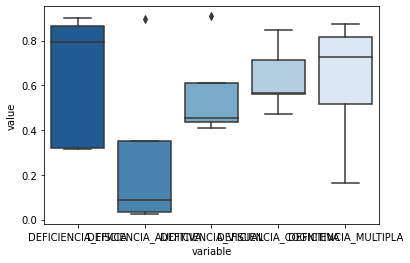

In [101]:
#Visualizando os outliers de alunos por deficiência
deficiencia = pd.DataFrame(data = np.random.random(size=(5,5)), columns = ['DEFICIENCIA_FISICA','DEFICIENCIA_AUDITIVA','DEFICIENCIA_VISUAL','DEFICIENCIA_COGNITIVA','DEFICIENCIA_MULTIPLA'])
sns.boxplot(x="variable", y="value", data=pd.melt(deficiencia), palette="Blues_r")
plt.show()

##Dados categóricos
Substituindo os dados (tipo de categoria administrativa, regiao e uf) do formato string 

In [102]:
#Substituindo o tipo de categoria administrativa para um código
categoria_adm = {
  "Especial": 0,
  "Pública Estadual": 1,
  "Pública Federal": 2,
  "Pública Municipal": 3
}
novo_df.TIPO_CATEGORIA_ADM = novo_df.TIPO_CATEGORIA_ADM.map(categoria_adm)
novo_df.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
5,55,6,2,Sudeste,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636
6,76,7,2,Sudeste,São Paulo,0.0,19.0,5.0,0.0,0.0,1.578947,2.105263,1.842105,1.052632,1.052632
7,84,8,2,Sudeste,Minas Gerais,18.0,6.0,15.0,4.0,1.0,2.071429,3.107143,2.761905,1.380952,1.380952
8,58,9,1,Sul,Paraná,18.0,6.0,15.0,13.0,0.0,2.741379,3.672414,2.293103,1.810345,1.810345
11,64,12,2,Sul,Rio Grande do Sul,46.0,21.0,37.0,17.0,0.0,3.937500,5.906250,5.218750,2.625000,2.625000


In [103]:
#Substituindo o nome das regiões por códigos
regiao = {
  "Centro-Oeste": 0,
  "Nordeste": 1,
  "Norte": 2,
  "Sudeste": 3,
  "Sul": 4
}
novo_df.REGIAO = novo_df.REGIAO.map(regiao)
novo_df.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
5,55,6,2,3,Minas Gerais,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636
6,76,7,2,3,São Paulo,0.0,19.0,5.0,0.0,0.0,1.578947,2.105263,1.842105,1.052632,1.052632
7,84,8,2,3,Minas Gerais,18.0,6.0,15.0,4.0,1.0,2.071429,3.107143,2.761905,1.380952,1.380952
8,58,9,1,4,Paraná,18.0,6.0,15.0,13.0,0.0,2.741379,3.672414,2.293103,1.810345,1.810345
11,64,12,2,4,Rio Grande do Sul,46.0,21.0,37.0,17.0,0.0,3.937500,5.906250,5.218750,2.625000,2.625000


In [104]:
#Substituindo o nome das unidades federativas por códigos
uf = {
  "Acre": 0,
  "Alagoas": 1,
  "Amapá": 2,
  "Amazonas": 3,
  "Bahia": 4,
  "Ceará": 5,
  "Distrito Federal": 6,
  "Espírito Santo": 7,
  "Goiás": 8,
  "Maranhão": 9,
  "Mato Grosso": 10,
  "Mato Grosso do Sul": 11,
  "Minas Gerais": 12,
  "Paraná": 13,
  "Paraíba": 14,
  "Pará": 15,
  "Pernambuco": 16,
  "Piauí": 17,
  "Rio Grande do Norte": 18,
  "Rio Grande do Sul": 19,
  "Rio de Janeiro": 20,
  "Rondônia": 21,
  "Roraima": 22,
  "Santa Catarina": 23,
  "Sergipe": 24,
  "São Paulo": 25,
  "Tocantins": 26
  }
novo_df.UF = novo_df.UF.map(uf)
novo_df.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
5,55,6,2,3,12,24.0,14.0,31.0,27.0,3.0,4.145455,5.563636,4.872727,2.763636,2.763636
6,76,7,2,3,25,0.0,19.0,5.0,0.0,0.0,1.578947,2.105263,1.842105,1.052632,1.052632
7,84,8,2,3,12,18.0,6.0,15.0,4.0,1.0,2.071429,3.107143,2.761905,1.380952,1.380952
8,58,9,1,4,13,18.0,6.0,15.0,13.0,0.0,2.741379,3.672414,2.293103,1.810345,1.810345
11,64,12,2,4,19,46.0,21.0,37.0,17.0,0.0,3.937500,5.906250,5.218750,2.625000,2.625000


In [105]:
novo_df.describe()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,32.744186,6637.759690,1.604651,2.589147,17.271318,13.333333,6.108527,15.565891,3.906977,0.550388,1.844061,2.153059,2.034221,1.183949,1.183949
std,31.320989,7303.802647,0.617690,1.072471,7.596002,18.320640,8.658666,42.366305,5.749242,0.999697,1.504790,2.041875,1.714380,0.997931,0.997931
min,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030534,0.022901,0.127273,0.022901,0.022901
25%,4.000000,605.000000,1.000000,2.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.545455,0.545455,0.750000,0.400000,0.400000
50%,25.000000,3279.000000,2.000000,3.000000,19.000000,5.000000,3.000000,4.000000,2.000000,0.000000,1.500000,1.500000,1.636364,1.000000,1.000000
75%,54.000000,15520.000000,2.000000,3.000000,25.000000,17.000000,8.000000,15.000000,5.000000,1.000000,2.777778,3.107143,2.666667,1.857143,1.857143
max,131.000000,24672.000000,3.000000,4.000000,26.000000,81.000000,43.000000,332.000000,27.000000,5.000000,6.000000,9.000000,8.000000,4.000000,4.000000


##Matriz de Correlação

In [106]:
#Usando matriz de correlação
matriz_corr = df.corr()
matriz_corr

,NUM_CURSOS,CODIGO_IES,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
NUM_CURSOS,1.000000,-0.480660,0.483570,0.271308,0.358844,0.503810,0.442508,-0.076056,0.016663,0.026430,-0.057398,-0.057398
CODIGO_IES,-0.480660,1.000000,-0.311680,-0.221917,-0.253225,-0.261333,-0.264941,-0.002603,-0.092910,-0.108087,-0.017777,-0.017777
DEFICIENCIA_FISICA,0.483570,-0.311680,1.000000,0.373157,0.520917,0.616079,0.471765,0.198019,0.246029,0.292028,0.188640,0.188640
DEFICIENCIA_AUDITIVA,0.271308,-0.221917,0.373157,1.000000,0.306801,0.300199,0.235363,0.278242,0.319987,0.361998,0.283392,0.283392
DEFICIENCIA_VISUAL,0.358844,-0.253225,0.520917,0.306801,1.000000,0.590417,0.465864,0.290336,0.348050,0.381587,0.300004,0.300004
DEFICIENCIA_COGNITIVA,0.503810,-0.261333,0.616079,0.300199,0.590417,1.000000,0.563351,0.211004,0.267263,0.285733,0.218657,0.218657
DEFICIENCIA_MULTIPLA,0.442508,-0.264941,0.471765,0.235363,0.465864,0.563351,1.000000,0.068154,0.106196,0.146138,0.071012,0.071012
RECURSOS_DEF_FISICA,-0.076056,-0.002603,0.198019,0.278242,0.290336,0.211004,0.068154,1.000000,0.945914,0.927598,0.992957,0.992957
RECURSOS_DEF_VISUAL,0.016663,-0.092910,0.246029,0.319987,0.348050,0.267263,0.106196,0.945914,1.000000,0.953901,0.950328,0.950328
RECURSOS_DEF_AUDITIVA,0.026430,-0.108087,0.292028,0.361998,0.381587,0.285733,0.146138,0.927598,0.953901,1.000000,0.931386,0.931386


/usr/local/lib/python3.7/dist-packages/biokit/viz/linkage.py:41: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix

/usr/local/lib/python3.7/dist-packages/biokit/viz/corrplot.py:335: MatplotlibDeprecationWarning:


The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.



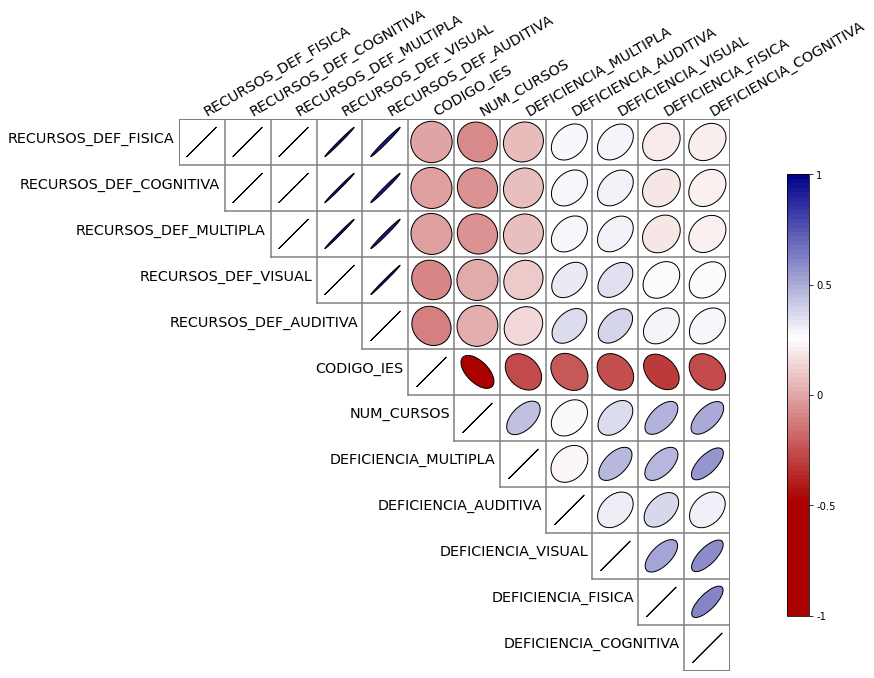

In [107]:
#Observando a correlação entre os dados
from biokit.viz import corrplot
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(40, 15)
fig.show()

##Normalização

In [108]:
novo_df.columns

Index(['NUM_CURSOS', 'CODIGO_IES', 'TIPO_CATEGORIA_ADM', 'REGIAO', 'UF',
       'DEFICIENCIA_FISICA', 'DEFICIENCIA_AUDITIVA', 'DEFICIENCIA_VISUAL',
       'DEFICIENCIA_COGNITIVA', 'DEFICIENCIA_MULTIPLA', 'RECURSOS_DEF_FISICA',
       'RECURSOS_DEF_VISUAL', 'RECURSOS_DEF_AUDITIVA',
       'RECURSOS_DEF_COGNITIVA', 'RECURSOS_DEF_MULTIPLA'],
      dtype='object')

In [109]:
#Colunas para normalizar
features_to_normalize = ['NUM_CURSOS','DEFICIENCIA_FISICA', 'DEFICIENCIA_AUDITIVA', 'DEFICIENCIA_VISUAL','DEFICIENCIA_COGNITIVA', 'DEFICIENCIA_MULTIPLA', 'RECURSOS_DEF_FISICA', 'RECURSOS_DEF_VISUAL', 'RECURSOS_DEF_AUDITIVA', 'RECURSOS_DEF_COGNITIVA', 'RECURSOS_DEF_MULTIPLA']

novo_df[features_to_normalize] = novo_df[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [110]:
#Dataframe normalizado
novo_df = novo_df[['NUM_CURSOS','TIPO_CATEGORIA_ADM', 'REGIAO', 'UF', 'DEFICIENCIA_FISICA', 'DEFICIENCIA_AUDITIVA', 'DEFICIENCIA_VISUAL','DEFICIENCIA_COGNITIVA', 'DEFICIENCIA_MULTIPLA', 'RECURSOS_DEF_FISICA', 'RECURSOS_DEF_VISUAL', 'RECURSOS_DEF_AUDITIVA', 'RECURSOS_DEF_COGNITIVA', 'RECURSOS_DEF_MULTIPLA']]
novo_df.head()

,NUM_CURSOS,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
5,0.415385,2,3,12,0.296296,0.325581,0.093373,1.000000,0.6,0.689328,0.617208,0.602771,0.689129,0.689129
6,0.576923,2,3,25,0.000000,0.441860,0.015060,0.000000,0.0,0.259389,0.231964,0.217819,0.258915,0.258915
7,0.638462,2,3,12,0.222222,0.139535,0.045181,0.148148,0.2,0.341889,0.343568,0.334653,0.341468,0.341468
8,0.438462,1,4,13,0.222222,0.139535,0.045181,0.481481,0.0,0.454119,0.406536,0.275106,0.449434,0.449434
11,0.484615,2,4,19,0.567901,0.488372,0.111446,0.629630,0.0,0.654492,0.655373,0.646723,0.654271,0.654271


#Clustering

##1- Usando o K-means

In [111]:
from sklearn.cluster import KMeans

In [112]:
novo_df.head()

,NUM_CURSOS,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
5,0.415385,2,3,12,0.296296,0.325581,0.093373,1.000000,0.6,0.689328,0.617208,0.602771,0.689129,0.689129
6,0.576923,2,3,25,0.000000,0.441860,0.015060,0.000000,0.0,0.259389,0.231964,0.217819,0.258915,0.258915
7,0.638462,2,3,12,0.222222,0.139535,0.045181,0.148148,0.2,0.341889,0.343568,0.334653,0.341468,0.341468
8,0.438462,1,4,13,0.222222,0.139535,0.045181,0.481481,0.0,0.454119,0.406536,0.275106,0.449434,0.449434
11,0.484615,2,4,19,0.567901,0.488372,0.111446,0.629630,0.0,0.654492,0.655373,0.646723,0.654271,0.654271


In [113]:
#Agrupando em 3 grupos
agrupador = KMeans(n_clusters = 3)
agrupador.fit(novo_df)

KMeans(n_clusters=3)

In [114]:
labels = agrupador.labels_
print(labels)

[0 1 0 0 1 2 1 1 0 2 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 2 2 1 1 0 2 1 1
 1 2 1 0 1 2 1 1 0 1 0 2 1 1 1 2 2 2 0 1 2 0 1 1 1 1 0 0 1 2 0 1 1 1 1 1 1
 0 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 1 2 2 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 0 0 2 2 1 1 1 0 2 1 1]


In [115]:
#Visualizando os clusters
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['RECURSOS_DEF_FISICA'], y=df['DEFICIENCIA_FISICA'], 
                         mode = 'markers',
                         marker = dict(color = agrupador.labels_.astype(np.float)),
                         text = labels))
fig.show()

In [116]:
#Visualização em três dimensões
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['DEFICIENCIA_VISUAL'],
                          y=df['RECURSOS_DEF_VISUAL'],
                          z=df['TIPO_CATEGORIA_ADM'],
                          mode = 'markers',
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                          text = labels))
fig.show()

In [117]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['DEFICIENCIA_VISUAL'],
                          y=df['RECURSOS_DEF_VISUAL'],
                          z=df['NUM_CURSOS'],
                          mode = 'markers',
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                          text = labels))
fig.show()

In [118]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['DEFICIENCIA_VISUAL'],
                          y=df['RECURSOS_DEF_VISUAL'],
                          z=df['UF'],
                          mode = 'markers',
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                          text = labels))
fig.show()

In [119]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['DEFICIENCIA_VISUAL'],
                          y=df['RECURSOS_DEF_VISUAL'],
                          z=df['REGIAO'],
                          mode = 'markers',
                          marker = dict(color = agrupador.labels_.astype(np.float)),
                          text = labels))
fig.show()

##2 - Usando o DBSCAN

In [120]:
from sklearn.cluster import DBSCAN
agrupador = DBSCAN(eps = 1.31,
                   min_samples = 10,
                   metric = 'euclidean')
agrupador.fit(novo_df)

DBSCAN(eps=1.31, min_samples=10)

In [121]:
#Visualizando o número total de clusters
np.unique(agrupador.labels_)

array([-1,  0,  1])

In [122]:
#Quando reduzimos muito o epsilon, todos os dados são consideradas ruídos. Para se organizar em clusters é necessário um número mínimo de 15 vizinhos.
agrupador = DBSCAN(eps=3, min_samples = 15, metric = 'euclidean')

# Observações: eps é a máxima distância entre os pontos/ mínimo de pontos é igual a 10/ a métrica de distância considerada'manhattan'
agrupador.fit(novo_df)
agrupador.labels_

array([ 0,  1,  0,  0,  1, -1,  1,  1,  0, -1,  1,  0,  1,  1,  0, -1,  0,
        0, -1,  1,  1,  0,  1,  0,  0,  0,  0,  0,  0, -1, -1,  1,  1,  0,
       -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  0, -1,  1,  1,
        1, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,  1,  0,  0,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  0,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1,  0,  0,  1, -1, -1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  0,
        0, -1, -1,  1,  1,  1,  0, -1,  1,  1])

Muita dificuldade em usar o DBScan, principalmente por causa da definição dos parâmetros a serem utilizados.

##3 - Usando o K-modes

In [123]:
#Instalando o k-modes
!pip install kmodes

In [124]:
# Fazendo o upgrade da última versão (recomendado)
!pip install --upgrade kmodes

In [125]:
#Importando bibliotecas
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
#Construindo um modelo com 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(novo_df)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 1220.0
Run 1, iteration: 2/100, moves: 4, cost: 1220.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9, cost: 1247.0
Run 2, iteration: 2/100, moves: 1, cost: 1247.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 32, cost: 1212.0
Run 3, iteration: 2/100, moves: 0, cost: 1212.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 7, cost: 1236.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 17, cost: 1226.0
Run 5, iteration: 2/100, moves: 1, cost: 1224.0
Run 5, iteration: 3/100, moves: 2, cost: 1224.0
Best run was number 3


array([2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2,
       2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 0, 1,
       1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint16)

In [128]:
novo_df.insert(0, "Cluster", clusters, True)
novo_df

,Cluster,NUM_CURSOS,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
5,2,0.415385,2,3,12,0.296296,0.325581,0.093373,1.000000,0.6,0.689328,0.617208,0.602771,0.689129,0.689129
6,1,0.576923,2,3,25,0.000000,0.441860,0.015060,0.000000,0.0,0.259389,0.231964,0.217819,0.258915,0.258915
7,2,0.638462,2,3,12,0.222222,0.139535,0.045181,0.148148,0.2,0.341889,0.343568,0.334653,0.341468,0.341468
8,0,0.438462,1,4,13,0.222222,0.139535,0.045181,0.481481,0.0,0.454119,0.406536,0.275106,0.449434,0.449434
11,0,0.484615,2,4,19,0.567901,0.488372,0.111446,0.629630,0.0,0.654492,0.655373,0.646723,0.654271,0.654271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,1,0.007692,1,3,25,0.012346,0.000000,0.000000,0.000000,0.0,0.246164,0.108844,0.174365,0.245681,0.245681
2522,1,0.015385,3,4,13,0.000000,0.000000,0.003012,0.000000,0.0,0.329923,0.220238,0.195535,0.329495,0.329495
2598,1,0.138462,1,1,9,0.012346,0.000000,0.006024,0.000000,0.0,0.021335,0.032626,0.030631,0.033943,0.033943
2605,1,0.000000,1,3,25,0.012346,0.000000,0.000000,0.000000,0.0,0.329923,0.220238,0.237875,0.245681,0.245681


In [135]:
cluster_0 = novo_df.loc[novo_df['Cluster'] == 0]
cluster_0.head()

,Cluster,NUM_CURSOS,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
8,0,0.438462,1,4,13,0.222222,0.139535,0.045181,0.481481,0.0,0.454119,0.406536,0.275106,0.449434,0.449434
11,0,0.484615,2,4,19,0.567901,0.488372,0.111446,0.629630,0.0,0.654492,0.655373,0.646723,0.654271,0.654271
34,0,1.000000,1,1,4,0.209877,0.302326,0.090361,0.407407,0.4,0.000000,0.000000,0.013892,0.000000,0.000000
40,0,0.669231,1,4,13,0.370370,0.581395,1.000000,0.222222,0.2,0.908626,0.908859,0.907621,0.908567,0.908567
50,0,0.407692,3,4,23,0.148148,0.255814,0.036145,0.111111,0.6,0.512953,0.455404,0.440168,0.511090,0.511090


In [136]:
cluster_0.shape

(41, 15)

In [137]:
cluster_1 = novo_df.loc[novo_df['Cluster'] == 1]
cluster_1.head()

,Cluster,NUM_CURSOS,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
6,1,0.576923,2,3,25,0.000000,0.441860,0.015060,0.000000,0.0,0.259389,0.231964,0.217819,0.258915,0.258915
22,1,0.292308,1,1,4,0.037037,0.000000,0.009036,0.074074,0.0,0.123746,0.125981,0.114111,0.123185,0.123185
30,1,0.046154,1,3,25,0.074074,0.069767,0.000000,0.000000,0.0,0.449580,0.299806,0.219729,0.461201,0.461201
32,1,0.046154,1,3,25,0.012346,0.000000,0.015060,0.148148,0.0,0.138473,0.188411,0.147146,0.102002,0.102002
33,1,0.984615,1,2,15,0.148148,0.604651,0.039157,0.074074,0.0,0.062412,0.042352,0.063591,0.044920,0.044920


In [138]:
cluster_1.shape

(59, 15)

In [139]:
cluster_2 = novo_df.loc[novo_df['Cluster'] == 2]
cluster_2.head()

,Cluster,NUM_CURSOS,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
5,2,0.415385,2,3,12,0.296296,0.325581,0.093373,1.000000,0.6,0.689328,0.617208,0.602771,0.689129,0.689129
7,2,0.638462,2,3,12,0.222222,0.139535,0.045181,0.148148,0.2,0.341889,0.343568,0.334653,0.341468,0.341468
278,2,0.807692,2,3,12,0.827160,0.651163,0.135542,0.888889,0.0,0.593845,0.538658,0.465554,0.594376,0.594376
279,2,0.800000,2,3,12,0.901235,0.813953,0.102410,0.518519,0.0,0.524565,0.456819,0.445947,0.528252,0.528252
293,2,0.276923,2,2,15,0.000000,0.046512,0.003012,0.037037,0.2,0.076381,0.054652,0.052494,0.075790,0.075790


In [140]:
cluster_2.shape

(29, 15)

Text(0, 0.5, 'Score de Silhueta')

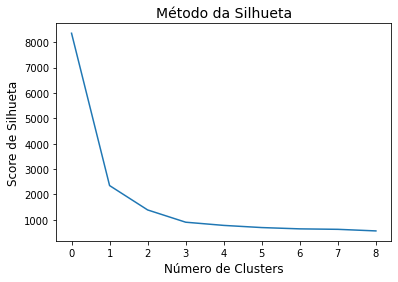

In [64]:
#Coeficiente de Silhueta
#Verificando melhor número de clusters
cost = []
for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(novo_df, categorical=[1,2,3])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.title('Método da Silhueta', fontsize=14)
plt.xlabel("Número de Clusters", fontsize=12)
plt.ylabel("Score de Silhueta", fontsize=12)

##4 - Usando o K-prototypes

In [ ]:
#Alternatively, you can build the latest development version from source:
#git clone https://github.com/nicodv/kmodes.git
#cd kmodes
#python setup.py install

In [61]:
#K-Prototypes
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2)
clusters = kproto.fit_predict(novo_df, categorical=[1,2,3])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 9, ncost: 914.5014325661322
Run: 1, iteration: 2/100, moves: 3, ncost: 902.8015896643565
Run: 1, iteration: 3/100, moves: 0, ncost: 902.8015896643565
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 14, ncost: 930.775772244208
Run: 2, iteration: 2/100, moves: 5, ncost: 916.6699511804977
Run: 2, iteration: 3/100, moves: 0, ncost: 916.6699511804977
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 5, ncost: 906.9512894492619
Run: 3, iteration: 2/100, moves: 1, ncost: 906.536802720153
Run: 3, iteration: 3/100, moves: 0, ncost: 906.536802720153
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 5, ncost: 900.8442975073126
Run: 4, iterati

In [ ]:
#Centróides do modelo treinado
print(kproto.cluster_centroids_)

[[2.22811671e-02 2.00085143e-02 1.12269447e-02 4.05068550e-03
  1.27713921e-02 9.57088814e-18 3.77479566e-01 2.53927508e-01
  2.26294763e-01 3.53169064e-01 3.53169064e-01 1.00000000e+00
  3.00000000e+00 2.50000000e+01]
 [7.84615385e-01 6.62551440e-01 6.51162791e-01 7.26907631e-01
  1.97530864e-01 6.00000000e-01 7.25326920e-01 7.03089621e-01
  6.97393187e-01 7.24704182e-01 7.24704182e-01 2.00000000e+00
  4.00000000e+00 1.30000000e+01]
 [2.57264957e-01 2.08504801e-01 1.47286822e-01 5.62248996e-02
  2.46913580e-01 8.88888889e-02 5.15610862e-01 4.23914592e-01
  4.29645909e-01 5.08633126e-01 5.08633126e-01 2.00000000e+00
  2.00000000e+00 1.30000000e+01]
 [2.93447293e-01 1.27114769e-01 7.92420327e-02 2.06381080e-02
  9.73936900e-02 8.88888889e-02 7.83121282e-02 5.98057616e-02
  9.19334819e-02 7.71208765e-02 7.71208765e-02 2.00000000e+00
  4.00000000e+00 8.00000000e+00]
 [7.70769231e-01 1.25925926e-01 4.32558140e-01 4.21686747e-02
  1.70370370e-01 3.20000000e-01 7.23860662e-02 6.60057234e-02


In [ ]:
#Training statistics
print(kproto.cost_)
print(kproto.n_iter_)

32.86516740908081
4


In [ ]:
#Contagem de cada cluster
pd.Series(clusters).value_counts()

0    47
2    44
1    26
3    12
dtype: int64

Text(0, 0.5, 'Score de Silhueta')

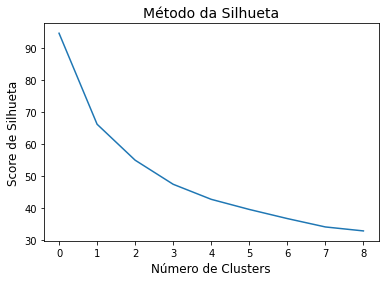

In [ ]:
#Coeficiente de Silhueta
#Verificando melhor número de clusters
cost = []
for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(novo_df, categorical=[1,2,3])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.title('Método da Silhueta', fontsize=14)
plt.xlabel("Número de Clusters", fontsize=12)
plt.ylabel("Score de Silhueta", fontsize=12)